In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Data/cleaned_postings.csv'
df = pd.read_csv(file_path)

In [3]:
print(df['company_name'].value_counts())

company_name
J. Galt                    604
Ingersoll Rand             513
TEKsystems                 510
Lowe's Companies, Inc.     507
Capital One                485
                          ... 
Crisp                        1
ABC Farigua Division         1
Ignitec Inc                  1
Bowdoin College              1
Galerie Candy and Gifts      1
Name: count, Length: 15203, dtype: int64


In [4]:
print(df['work_type'].value_counts())

work_type
FULL_TIME     75914
CONTRACT       8426
PART_TIME      7671
TEMPORARY       966
INTERNSHIP      637
VOLUNTEER       486
OTHER           340
Name: count, dtype: int64


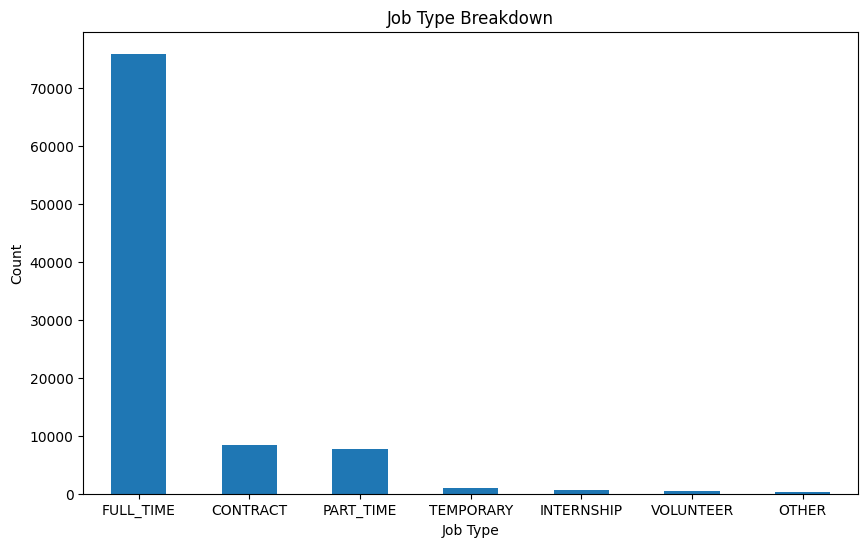

In [5]:
plt.figure(figsize = (10, 6))
df['work_type'].value_counts().plot(kind = 'bar')
plt.title('Job Type Breakdown')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

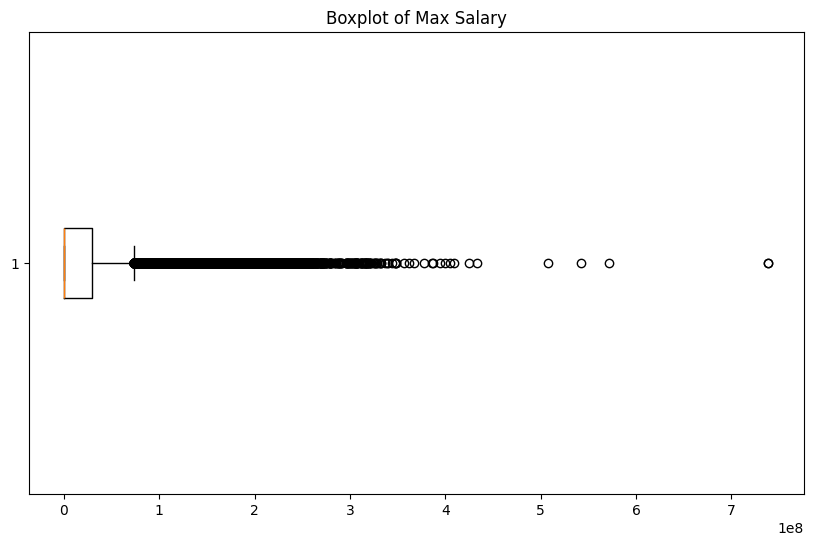

In [6]:
plt.figure(figsize = (10, 6))
plt.boxplot(df['max_salary'], vert = False)
plt.title('Boxplot of Max Salary')
plt.show()

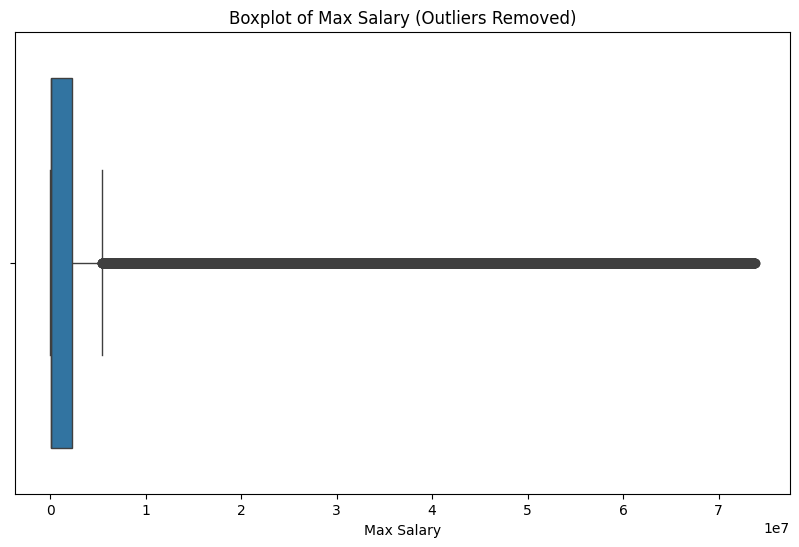

In [7]:
Q1 = df['max_salary'].quantile(0.25)
Q3 = df['max_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned_max_salary = df[(df['max_salary'] >= lower_bound) & (df['max_salary'] <= upper_bound)]

plt.figure(figsize = (10, 6))
sns.boxplot(x = df_cleaned_max_salary['max_salary'])
plt.title('Boxplot of Max Salary (Outliers Removed)')
plt.xlabel('Max Salary')
plt.show()

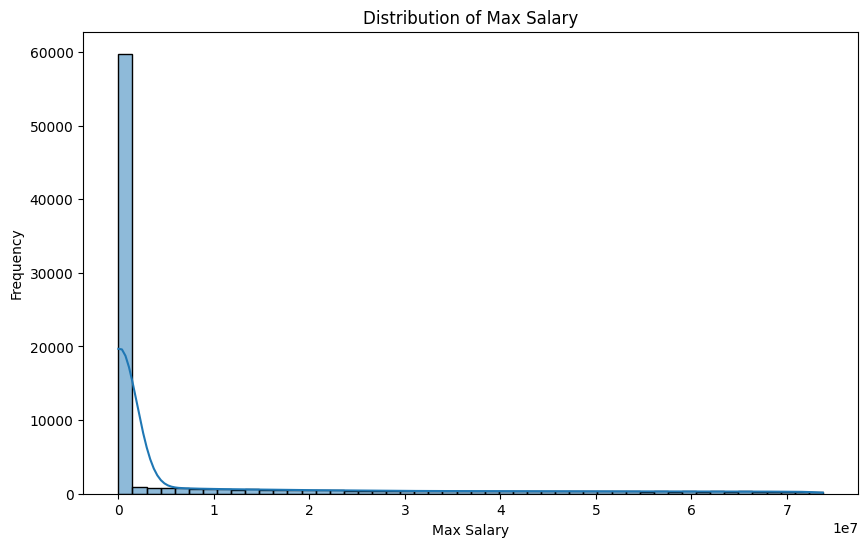

In [8]:
plt.figure(figsize = (10, 6))
sns.histplot(df_cleaned_max_salary['max_salary'], bins = 50, kde = True)
plt.title('Distribution of Max Salary')
plt.xlabel('Max Salary')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Views')

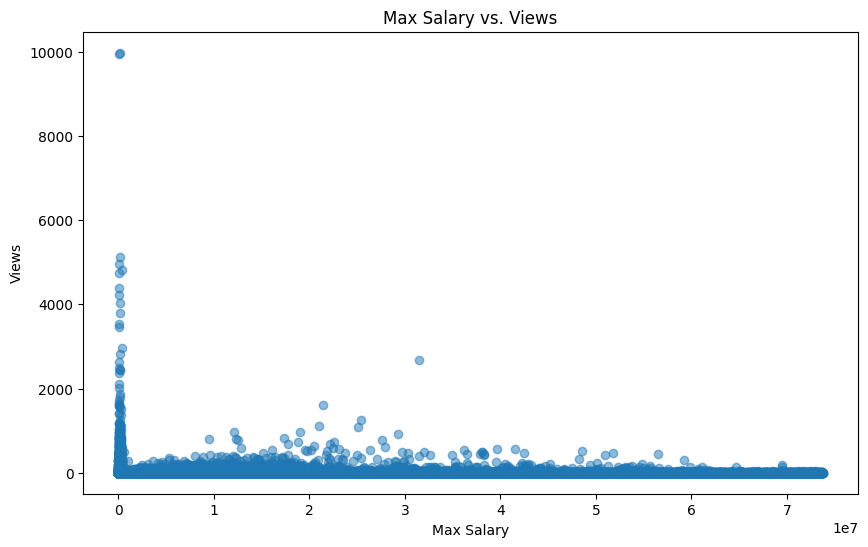

In [9]:
plt.figure(figsize = (10, 6))
plt.scatter(df_cleaned_max_salary['max_salary'], df_cleaned_max_salary['views'], alpha = 0.5)
plt.title('Max Salary vs. Views')
plt.xlabel('Max Salary')
plt.ylabel('Views')

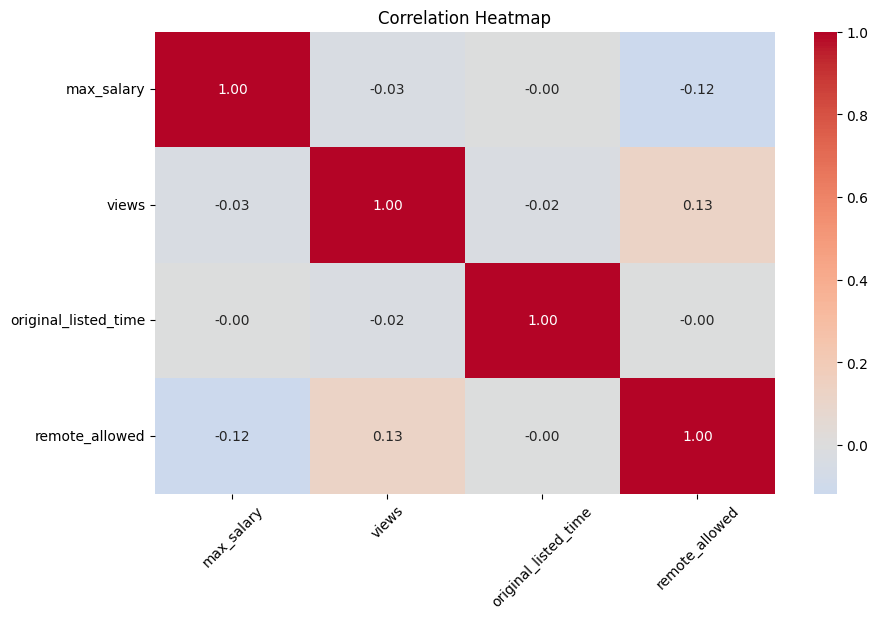

In [10]:
plt.figure(figsize = (10, 6))
sns.heatmap(df_cleaned_max_salary.select_dtypes(include=['float64', 'int64']).corr(), annot = True, cmap = 'coolwarm', center = 0, fmt = '.2f')
plt.title('Correlation Heatmap')
plt.xticks(rotation = 45)
plt.show()